Load the neceessay packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
import math

Read the data and check for any missing values in the data if present then use imputauion techniques to comlete the data ,find the shape of data and fix target comlumn
Use describe function to find the summary of the data

In [3]:
data = pd.read_csv("heart.csv")
data.isnull().sum().sum()
print(data.shape)
print(data.describe())

(303, 14)
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860

Use EDA to understand about the feautures in the dataset 
store data with target 1 and 0 separately
Visulise all variable distributions to find hidden insights in it


In [4]:
disease=data[data['target'] == 1]
nodisease=data[data['target'] == 0]

Pie chart of data with disease shows that in the given sample male are affected more

([<matplotlib.patches.Wedge at 0x21aa3501588>,
 [Text(-1.07809,-0.21845,'Male'), Text(1.07809,0.21845,'Female')],
 [Text(-0.58805,-0.119154,'56.4%'), Text(0.58805,0.119154,'43.6%')])

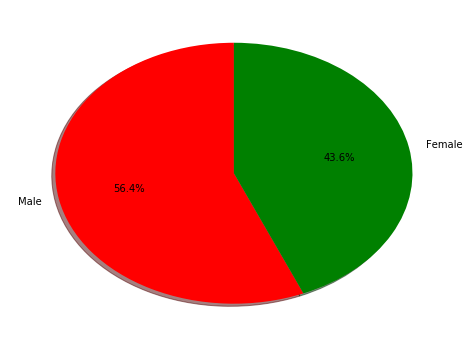

In [6]:
male_dis =len(disease[disease['sex'] == 1])
female_dis = len(disease[disease['sex']== 0])
plt.figure(figsize=(8,6))
labels = 'Male','Female'
sizes = [male_dis,female_dis]
colors = ['red', 'green']
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)


 Pie chart of data with no disease shows that in the given sample male are affected more.Since from two pie charts it can be understood that samples contains more men data than women

([<matplotlib.patches.Wedge at 0x1a5b4593e48>,
 [Text(-0.571542,-0.939861,'Male'), Text(0.571542,0.939861,'Female')],
 [Text(-0.31175,-0.512652,'82.6%'), Text(0.31175,0.512652,'17.4%')])

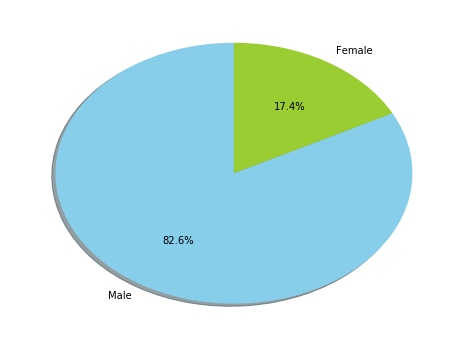

In [49]:
male_no =len(nodisease[nodisease['sex'] == 1])
female_no = len(nodisease[nodisease['sex']== 0])
plt.figure(figsize=(8,6))
labels = 'Male','Female'
sizes1 = [male_no,female_no]
colors = ['blue', 'yellowgreen']
explode = (0, 0)
plt.pie(sizes1, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

From the pie chart it is understood that patients with chest pain of type 0 has less chance of attacks

([<matplotlib.patches.Wedge at 0x21aa38de940>,
 [Text(0.78662,-0.768914,'Chest Pain Type:0'),
  Text(-0.248259,1.07162,'Chest Pain Type:1'),
  Text(-0.820802,0.732314,'Chest Pain Type:2'),
  Text(-1.08606,0.174551,'Chest Pain Type:3')],
 [Text(0.429066,-0.419407,'75.4%'),
  Text(-0.135414,0.584519,'6.5%'),
  Text(-0.44771,0.399444,'13.0%'),
  Text(-0.592398,0.0952095,'5.1%')])

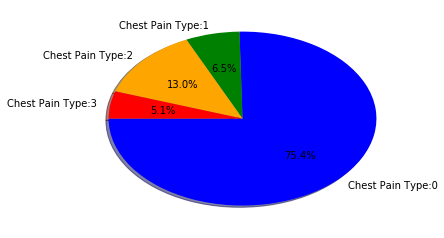

In [8]:
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(nodisease[nodisease['cp'] == 0]),len(nodisease[nodisease['cp'] == 1]),
         len(nodisease[nodisease['cp'] == 2]),
         len(nodisease[nodisease['cp'] == 3])]
colors = ['blue', 'green','orange','red']
explode = (0, 0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)

From the pie chart it is understood that patients with chest pain of type 2 has more chance of attacks

([<matplotlib.patches.Wedge at 0x21aa3885438>,
 [Text(-0.810415,-0.743792,'Chest Pain Type:0'),
  Text(0.704389,-0.844888,'Chest Pain Type:1'),
  Text(0.3795,1.03246,'Chest Pain Type:2'),
  Text(-1.04935,0.329944,'Chest Pain Type:3')],
 [Text(-0.442045,-0.405705,'23.6%'),
  Text(0.384212,-0.460848,'24.8%'),
  Text(0.207,0.563162,'41.8%'),
  Text(-0.572373,0.17997,'9.7%')])

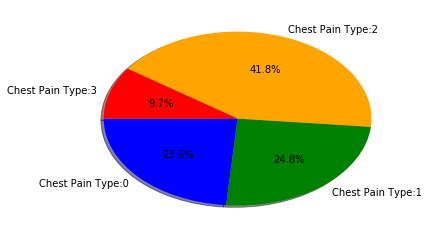

In [7]:
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(disease[disease['cp'] == 0]),len(disease[disease['cp'] == 1]),
         len(disease[disease['cp'] == 2]),
         len(disease[disease['cp'] == 3])]
colors = ['blue', 'green','orange','red']
explode = (0, 0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)

use scatter =plot to find relation between variables and target

Text(0,0.5,'Thalach')

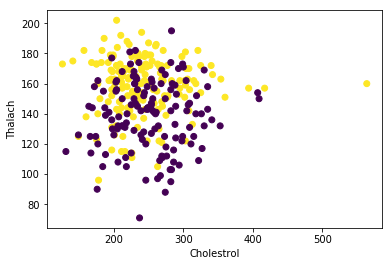

In [52]:
plt.scatter(x='chol',y='thalach',data=data,c='target')
plt.xlabel('Cholestrol')
plt.ylabel('Thalach')

Text(0,0.5,'Age')

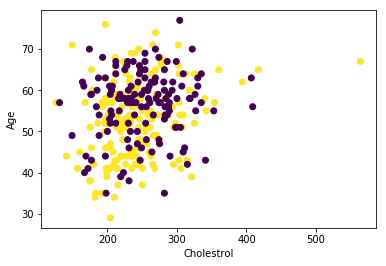

In [53]:
plt.scatter(x='chol',y='age',data=data,c='target')
plt.xlabel('Cholestrol')
plt.ylabel('Age')

Use histograms to visulise how data is distributed

(array([  1.,   8.,  25.,  21.,  29.,  31.,  16.,  21.,  11.,   2.]),
 array([ 29. ,  33.7,  38.4,  43.1,  47.8,  52.5,  57.2,  61.9,  66.6,
         71.3,  76. ]),
 <a list of 10 Patch objects>)

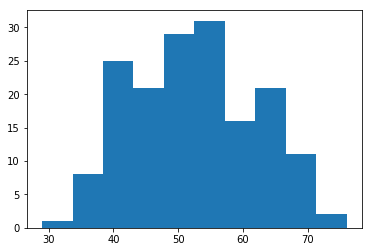

In [54]:
plt.hist(disease['age'])

(array([  4.,   7.,  10.,  11.,  17.,  45.,  24.,  15.,   4.,   1.]),
 array([ 35. ,  39.2,  43.4,  47.6,  51.8,  56. ,  60.2,  64.4,  68.6,
         72.8,  77. ]),
 <a list of 10 Patch objects>)

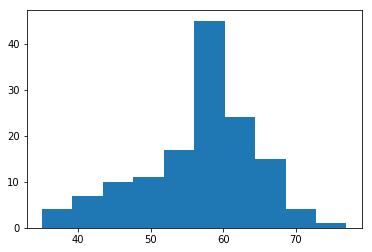

In [55]:
plt.hist(nodisease['age'])

(array([  6.,  46.,  61.,  29.,  18.,   2.,   2.,   0.,   0.,   1.]),
 array([ 126. ,  169.8,  213.6,  257.4,  301.2,  345. ,  388.8,  432.6,
         476.4,  520.2,  564. ]),
 <a list of 10 Patch objects>)

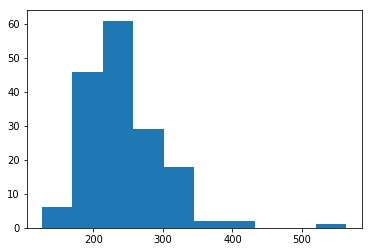

In [56]:
plt.hist(disease['chol'])

(array([  2.,  11.,  20.,  27.,  30.,  24.,  14.,   8.,   0.,   2.]),
 array([ 131. ,  158.8,  186.6,  214.4,  242.2,  270. ,  297.8,  325.6,
         353.4,  381.2,  409. ]),
 <a list of 10 Patch objects>)

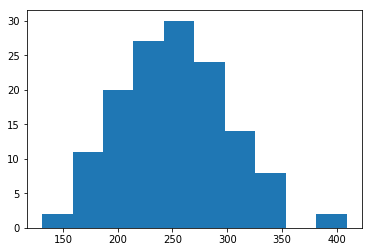

In [57]:
plt.hist(nodisease['chol'])

(array([  2.,   5.,   8.,   8.,  18.,  34.,  41.,  34.,  12.,   3.]),
 array([  96. ,  106.6,  117.2,  127.8,  138.4,  149. ,  159.6,  170.2,
         180.8,  191.4,  202. ]),
 <a list of 10 Patch objects>)

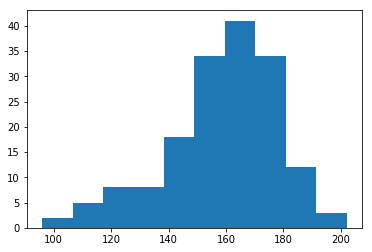

In [58]:
plt.hist(disease['thalach'])

(array([  1.,   3.,  10.,  16.,  25.,  28.,  22.,  24.,   8.,   1.]),
 array([  71. ,   83.4,   95.8,  108.2,  120.6,  133. ,  145.4,  157.8,
         170.2,  182.6,  195. ]),
 <a list of 10 Patch objects>)

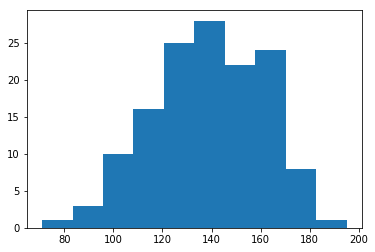

In [59]:
plt.hist(nodisease['thalach'])

Use selectkbest to select which factors are contributing best for the target variable which can be used for creatin a model

In [9]:
X = data.iloc[:,0:13] 
y = data.iloc[:,-1]
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835


Use corelation map to find which factors are corelated with each other and result

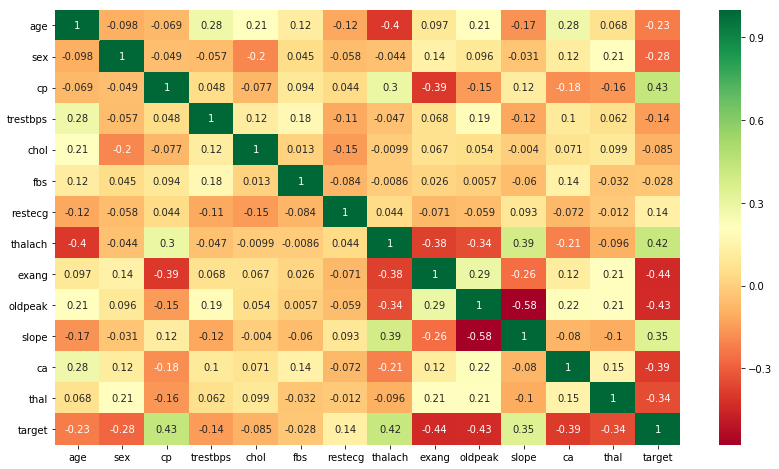

In [61]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True,cmap="RdYlGn")

In [62]:
Use logistic regression model and calculate the accuracy

SyntaxError: invalid syntax (<ipython-input-62-dcf12cc9038f>, line 1)

In [63]:
dataframe = pd.read_csv("heart.csv", header =[1])
array = dataframe.values
X = array[:,[0,1,2,3,4,5,6,7,9,11,12]]
print(X)
Y = array[:,13]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
model_log = LogisticRegression()
model_log.fit(X_train, Y_train)
result = model_log.score(X_test, Y_test)
print("Accuracy:",result)

[[ 37.    1.    2.  ...,   3.5   0.    2. ]
 [ 41.    0.    1.  ...,   1.4   0.    2. ]
 [ 56.    1.    1.  ...,   0.8   0.    2. ]
 ..., 
 [ 68.    1.    0.  ...,   3.4   2.    3. ]
 [ 57.    1.    0.  ...,   1.2   1.    3. ]
 [ 57.    0.    1.  ...,   0.    1.    2. ]]
Accuracy: 0.89


Use decision tree classifier model and calculate the accuracy

In [64]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,Y_train)
y_pred = dtc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.75


Use random forest model and calculate the accuracy

In [65]:
ra=RandomForestClassifier(n_estimators=290,criterion='gini')
ra.fit(X_train,Y_train)
y_pred=ra.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.83


Use k nearest neighbour  model and calculate the accuracy

In [66]:
kvalue=list(data.shape)
kv=int(math.sqrt(kvalue[0]))
knn = KNeighborsClassifier(n_neighbors=kv)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.64


Since Logistic regression model provides the best accuracy for data we can choose it.

In [71]:
age=int(input("Your Age:"))
sex=int(input("Your gender 1-male 2-female:"))
cp=int(input("Chest Pain Type:"))
bp=int(input("Blood Pressure:"))
ch=int(input("Cholestrol:"))
fs=int(input("Fasting Sugar Level:"))
ec=int(input("ECG:"))
hb=int(input("Heartbeat Rate:"))
st=int(input("ST derpression:"))
maj=int(input("Major vessels:"))
tha=int(input("thal:"))
inp=[[age,sex,cp,bp,ch,fs,ec,hb,st,maj,tha]]
pre= model_log.predict(inp)
if pre[0]==0.0:
    print("You are safe.Please check after 6 months.")
else:
    print("You are at Risk. Please contact doctor quickly as possible.")

Your Age:31
Your gender 1-male 2-female:1
Chest Pain Type:1
Blood Pressure:22
Cholestrol:12
Fasting Sugar Level:99
ECG:33
Heartbeat Rate:55
ST derpression:4
Major vessels:3
thal:2
You are safe.Please check after 6 months.


Find the average of all the values to find the trend

In [44]:
li1=['Age            -','Chest Pressure -','Trest bps      -','Cholestrol     -','Fast Sugar     -','ECG           -','Heart Rate     -','Exang          -','ST             -','Excercise     -','Major vessels-','Thal           -']
print("Male:")
mal_dis=disease[disease['sex']==1]
li=['age','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
for i in range (len(li)):
    print(li1[i],sum(mal_dis[li[i]])/303)
print("Female:")
mal_dis=disease[disease['sex']==0]
li=['age','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
for i in range (len(li)):
    print(li1[i],sum(mal_dis[li[i]])/303)



Male:
Age            - 15.6237623762
Chest Pressure - 0.432343234323
Trest bps      - 39.8217821782
Cholestrol     - 70.897689769
Fast Sugar     - 0.0561056105611
ECG           - 0.184818481848
Heart Rate     - 49.6930693069
Exang          - 0.049504950495
ST             - 0.185808580858
Excercise     - 0.491749174917
Major vessels- 0.125412541254
Thal           - 0.679867986799
Female:
Age            - 12.9636963696
Chest Pressure - 0.316831683168
Trest bps      - 30.5907590759
Cholestrol     - 61.0099009901
Fast Sugar     - 0.019801980198
ECG           - 0.138613861386
Heart Rate     - 36.600660066
Exang          - 0.026402640264
ST             - 0.131683168317
Excercise     - 0.376237623762
Major vessels- 0.0726072607261
Thal           - 0.475247524752


From the above value can be treated as the reference values to be aware when the values are in range of the above values